<a href="https://colab.research.google.com/github/SchneiderJs/Alzheimer-s-Classifier/blob/main/AlzheimerIdentificationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


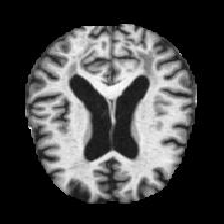

In [16]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator


base_folder = '/content/drive/My Drive/Dataset/Alzheimer_s Dataset/'

datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/train/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/test/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


x_train, y_train = train_generator.next()

cv2_imshow(x_train[0])

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(208, 176, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 206, 174, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 206, 174, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 103, 87, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 286752)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                18352192  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               